# Regresión Lineal: Predicción de Precios de Autos
**Grupo 2**
 * Nicolás Robayo Pardo
 * Andres Cepeda
 
Entregada el 6 de Septiembre de 2021
 
Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **9 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

In [5]:
results = {}

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [6]:
# En realidad, para este caso no es necesario escalar la variable dependiente.
# Esto garantiza tener un RMSE comparable entre experimentos
Y = df.price

In [7]:
# Codificador de dummies
df_ohe = pd.get_dummies(df)
# Inicialización de escalador
scaler = MinMaxScaler()
# Escalación de dataframe
df_scl_ohe = scaler.fit_transform(df_ohe)
# Creación nuevo DataFrame
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()
# Guardar el dataframe para referencia
caso1 = df_scl_ohe
caso1.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

#### Separación de Datos

In [8]:
# Eliminar etiqueta a predecir y crear datos X
X = df_scl_ohe.drop(['price'], axis=1)
# Etiqueta a predecir
#y = df_scl_ohe['price']
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [9]:
# Importación de metodos regresores.
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Instanciación de modelo de regresión lineal
model_1 = LinearRegression()
# Fit del modelo con datos train
model_1.fit(X_train, y_train)
#Predicción de modelo con test
preds = model_1.predict(X_test)
#Obtención del RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
# R cuadrado
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')
results.update({( "One-Hot","MinMaxScaler", "20%"): [rmse , rs]})

RMSE: 1858.859
R^2: 0.917



In [10]:
len(model_1.coef_)

31

Los coeficientes del modelo

In [11]:
print(model_1.intercept_, model_1.coef_)

2315.5315207739823 [ 1.73321068e+04 -1.07001962e+04 -2.14932775e+03 -2.81882862e+03
  1.19184138e+04 -6.02756068e+03 -4.60494640e+03 -8.83134643e+03
 -5.68559140e+02  9.45924285e+02 -9.63879780e+02  6.36754435e+02
  2.49931956e+03 -6.32885391e+03  1.68643247e+04  8.33662423e+03
 -1.00178072e+03 -1.01412238e+03  2.47540441e+04 -6.51470534e+03
 -4.74153243e+03 -5.80634285e+03 -7.63336124e+03  3.49323968e+02
 -8.18315170e+02 -1.81898940e-12  4.68991202e+02 -1.91269765e+03
  1.47703099e+03  8.46746010e+02 -4.11079345e+02]


In [12]:
y_test.to_numpy() - preds

array([ -860.67635297,  -291.09143125,  -407.39758599, ...,
        1217.77724713,   -53.68872232, -1263.07496951])

-5819.197976439205

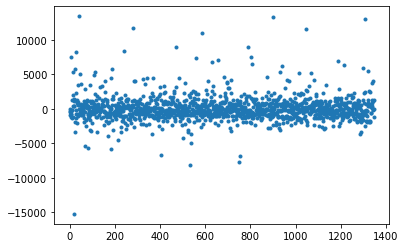

In [13]:
# Los errores tienden al 0
plt.plot(y_test.to_numpy() - preds, '.')


* En el **Caso 1** vemos que usando una codificación One-Hot se obtiene un **$R^2$** DE 0.917 lo cual es muy bueno para un modelo de predicción. El **RMSE** es de 1858,8. Observe que una variable toma el lugar del intercepto como caso base debido a que se usa como insumo de los datos `X`
 una matriz con todas las dummys.

* La codificación One-Hot codifica cada variable categorica como varias columnas de 0-1 para cada valor único de la variable. La Estandarización MinMax produce que (por default) el valor máximo de la variable se convierta en 1 y el valor mínimo en 0 y se escale los valores de la variable entre estos dos limites.

* Para realizar la transformación de datos categóricos en una regresión lineal se recomienda usar la codificación dummy sobre la ordinal dado que esta implica un orden sobre los posibles valores de la variable lo cual no siempre es el caso. Además, produce que la separación numerica entre valores sea la misma. Esto puede producir un modelo mal especificado.

### Caso 2: Codificación Ordinal (MinMaxScaler)

#### Codificación Ordinal

In [14]:
# Para este ejemplo se cambiará el codificador a Ordinal
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array Mejor usar .to_numpy()
min_max_scaler = MinMaxScaler()# Default es 0,1
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()
caso2 = df_scl_oe

#### Separación de Datos

In [15]:
X = df_scl_oe.drop(['price'], axis=1)
#y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [16]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')
results.update({( "Ordinal","MinMaxScaler", "20%"): [rmse , rs]})

RMSE: 2975.659
R^2: 0.787



* Ahora se uso un codificador ordinal el cual codifica cada variable categorica como una columna de enteros desde 0 hasta $n-1$ (por default). Ahora, dado que luego se uso el escalador de Min-Max tendremos como resultado una columna por cada variable categórica con valores de 0 a 1 donde cada valor unico esta separado en esta escala [0,1].

* El **$R^2$** es de 0.787 y el RSME es de 2975,6. Esta transformación puede no ser muy util ya que implica un orden ordinal de los datos donde unos tienen un valor numérico superior a otros y están separados por rangos numericos equidistantes. Puede que por esto, este modelo se desempeña peor prediciendo que el anterior que usa la codificación dummy

Para la elaboración de la primera parte de la tarea usaremos las siguientes funciones:

In [17]:
def regresion_lineal(X_train, X_test, y_train, y_test):
    '''
    Inputs: Resultado de la función  train_test_split
    Output: Modelo lineal fitted, RMSE del modelo lineal, R^2 del modelo
    '''
    # Instanceación del modelo lineal
    modelo = LinearRegression()
    # "Optimización" Fitting del modelo lineal con datos train
    modelo.fit(X_train, y_train)
    # Predicción con el modelo de los datos de prueba
    preds = modelo.predict(X_test)
    #Obtención de métrica RMSE
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    # Obtención de métrica R^2
    rs = modelo.score(X_test, y_test)
    
    print(f'RMSE: {round(rmse,3)}')
    print(f'R^2: {round(rs,3)}\n')
    return modelo, rmse, rs
    

### Caso 3: Codificación One-Hot (RobustScaler)

#### Codificación One-Hot

* En este caso estamos usando la estandarización RobustScaler la cual previene una estandarización dominada por outliers o valores extremos. Un fallo importante de la estandarización MinMax es que en caso de outliers se puede dañar la escala usada al concentrar el resto de valores en un rango mucho menor lo que provoca una disminución en la capacidad de predicción. Para evitar esto el RobustScaler realiza el escalamiento con el rango intercuartil entre el 25avo cuantil y el 75avo. Esto da mejores resultados en caso de outliers en los modelos de predicción. Tambien se resta la media antes de realizar el escalamiento para centrar los datos. 

In [18]:
# Hacer dummies
df_ohe = pd.get_dummies(df)
# Instanceamos el escalador
scaler = RobustScaler()
# Transformamos los datos
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
display(df_scl_ohe.head())
caso3 = df_scl_ohe

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [19]:
X = df_scl_ohe.drop(['price'], axis=1)
#y = df_scl_ohe['price']
# Usamos nuestra función con un test_size de 20% como veniamos haciendo. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
#Hacemos la separación
caso3_modelo, caso3_rmse, caso3_rs = regresion_lineal(X_train, X_test, y_train, y_test)
results.update({( "One-Hot","RobustScaler", "20%"): [caso3_rmse , caso3_rs]})

RMSE: 1858.859
R^2: 0.917



El **$R^2$** de este modelo es de 0.917 y el RMSE es de 1858.8. No hay una mejora frente a usar la estandarización Min-Max, puede que porque no hay outliers en los datos.

### Caso 4

#### Codificación Ordinal

In [20]:
# Usamos el codigo del caso 2
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array Mejor usar .to_numpy()
min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()
caso4 = df_scl_oe

#### Separación de Datos

In [21]:
X = df_scl_oe.drop(['price'], axis=1)
#y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
caso4_modelo, caso4_rmse, caso4_rs = regresion_lineal(X_train, X_test, y_train, y_test)
results.update({( "Ordinal","RobustScaler", "20%"): [caso4_rmse , caso4_rs]})


RMSE: 2975.659
R^2: 0.787



El **$R^2$** de este modelo es de 78,7% y el RMSE es de 2975,6. El R cuadrado empeoro y el RMSE aumento frente al caso con el mismo estandarizador dado que la codificación ordinal no es la correcta para las variables categórticas

### Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)

#### Codificación Ordinal

In [22]:
#Los datos del caso 2 corresponden a una codificación ordinal y un escalamiento de minmax Scaler
X = caso2.drop(['price'], axis=1)
#y = caso2['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3, random_state=22)

#### Separación de Datos

In [23]:
caso5_modelo, caso5_rmse, caso5_rs = regresion_lineal(X_train, X_test, y_train, y_test)
results.update({( "Ordinal","MinMaxScaler", "30%"): [caso5_rmse , caso5_rs]})

RMSE: 2908.859
R^2: 0.785



El **$R^2$** del modelo es de 78,5% y el RMSE es de 2908. 
En principio, este modelo tiene los mismos grados de libertad que el que se entrena con 80% de los datos y para una regresión lineal no es usual separar en train y test, a menos que se use regularización.  Las métricas de desempeño empeoran pero solo ligeramente sobre el caso base: Caso 2

### Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)

#### Codificación Ordinal

In [24]:
X = caso2.drop(['price'], axis=1)
#y = caso2['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.55, random_state=22)

#### Separación de Datos

In [25]:
caso6_modelo, caso6_rmse, caso6_rs = regresion_lineal(X_train, X_test, y_train, y_test)
results.update({( "Ordinal","MinMaxScaler", "55%"): [caso6_rmse , caso6_rs]})

RMSE: 2942.394
R^2: 0.784



El **$R^2$** es de 78,4% y el RMSE es de 2942.39

### Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

#### Codificación Ordinal

In [26]:
X = caso2.drop(['price'], axis=1)
#y = caso2['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=22)

#### Separación de Datos

In [27]:
caso7_modelo, caso7_rmse, caso7_rs = regresion_lineal(X_train, X_test, y_train, y_test)
results.update({( "Ordinal","MinMaxScaler", "80%"): [caso7_rmse , caso7_rs]})

RMSE: 2975.659
R^2: 0.787



El **$R^2$** es de 78,7% y el RMSE es de 2975,6

## Análisis

Recordemos que el **$R^2= 1-\frac{SSE}{SST}= 1-\frac{n\times MSE}{\sum_{i=1}^{n}{\left(y_i-\bar y\right)^2}}$** es la fracción de la suma total de cuadrados que es explicada por la regresión y el $RMSE = \sqrt{MSE}= \sqrt{\frac{1}{n} \sum_{i=1}^{n}{\left(y_i-\bar y\right)^2}}$ es una medida de la desviación promedio de los estimados de sus valores observados. Algunos modelos logran explicar de forma exitosa los datos al lograr, en el caso del modelo MinMax con One-Hot encoding un **$R^2=91.7\%$**. Se observa una disminución de hasta 12 puntos en **$R^2$** entre los experimentos.

Recuerden que la variable dependiente $y$ (`price`) no fue estandarizada para tener RMSE comparables. Esto no conlleva ningun cambio al modelo.

One-Hot                   Ordinal                            \
           MinMaxScaler RobustScaler MinMaxScaler                             
                    20%          20%          20%          30%          55%   
RMSE        1858.859085  1858.859085  2975.658869  2908.859319  2942.394005   
R Cuadrado     0.917064     0.917064     0.787472     0.784548     0.784183   

                                      
                        RobustScaler  
                    80%          20%  
RMSE        2975.658869  2975.658869  
R Cuadrado     0.787472     0.787472

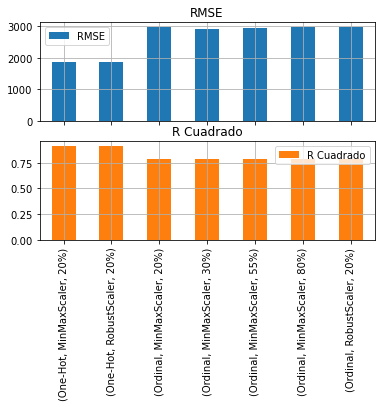

In [28]:
df_resultados = pd.DataFrame.from_dict(results).T.sort_index()
df_resultados.columns = ["RMSE","R Cuadrado"]
ax = df_resultados.plot.bar( subplots=True, grid = True)
df_resultados.T

* El términos de **$R^2$** y del **RMSE** podemos concluir que, para las variaciones realizadas en las variables categóricas, 
este solo cambia drásticamente con el esquema de codificación. El R cuadrado es mayor y el RMSE es menor (lo cual es bueno) con la codificación One-Hot. Vemos un un mejor comportamiento con la
codificación dummy (One-Hot) que con la ordinal. Esto era esperado dado que para variables
categoricas la codificación dummy es preferida al no introducir sesgos de orden de ranqueo natural  como si lo hace la codificación ordinal. No se sabe a priori si los valores de la
variable tienen un orden o se puede dar un valor numérico con un espaciado igual por lo que 
esto por lo general produce problemas de especificación y no ayuda a predecir mejor. Esto tiene sentido al inspeccionar la tabla de datos. El modelo del carro, el tipo de transmisión y el tipo de combustible no tienen un rankeo evidente.

* Al aumentar el porcentaje de datos apartado para para test vemos que en terminos del RMSE el mejor porcentaje es 30% al tener un valor mínimo entre todos los porcentajes probados. En terminos del **$R^2$** el mejor valor está en 20% aunque realmente el cambio no es muy significativo para todos los porcentajes. Es importante apartar algunos datos como test dado que, aunque sea regresión lineal, nuestro objetivo es predecir con nuevos datos y estamos haciendo varios experimentos  

* Vemos que el cambio de escalamiento de datos usado no afecta de ninguna forma la predicción de los datos nuevos. Los valores de RMSE y **$R^2$** es el mismo para los dos casos en donde se controlan todos los parámetros excepto el escalamiento. De cualquier forma, siempre es bueno escalar los datos de alguna forma para evitar algunos problemas relacionados con la regresión lineal. 




## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [29]:
# Hacer dummies
df_ohe = pd.get_dummies(df)
# Instanceamos el escalador
scaler = RobustScaler()
# Transformamos los datos
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
# Usamos nuestra función con un test_size de 20% como veniamos haciendo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [30]:
# Convertimos los datos a arreglos tipo numpy para operaciones matriciales
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

p = X_train_array.shape[1] # Número de variables independientes
n_train = X_train_array.shape[0]# Número de datos en entrenamiento
#Inicialización de w
w0 = np.random.random(size=p)# Inicializar aleatoriamente #
w = w0.copy()
#Selección de par aleatorio
i = np.random.randint(low=0, high=n_train-1)# Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]
#Inicialización de criterio de parada
eps = 1e-8 # Se define un criterio de parada basado en el error en la predicción
# Encontramos que para 1e-8 empiezan a haber rendimientos decrecientes en el número de iteraciones.
# Más iteraciones (menos eps) no implica un aumento considerable en el R2 de prueba. 
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
#Inicialización de valor de la tasa de aprendizaje 
vcov = np.cov(X_train_array) # se obtiene la matriz de varianza covarianza
# max_eig = max(np.linalg.eigvals(vcov)) # Maximo valor propio de la matriz. Es la parte más demorada!.
max_eig = 431.02649 # Como es demorado, se usa siempre el valor para un set de entrenamiento. Es una aproximación!
tasa = 2/max_eig # Selección de tasa de aprendizaje 2/lambda_max
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

#Ciclo iterativo según algoritmo de descenso de gradiente
k = 0 # Número de iteraciones
while dif>eps:
    # Desarrollo de algoritmo #
    gActual = np.dot(w,xActual) # Valor de g(wx)
    error = gActual-yActual # Error de la iteración
    errores.append(error) # Inserta el error
    w_new = w - tasa*error*xActual # Calcula el nuevo valor de w
    dif = np.linalg.norm(w_new-w) # Calcula la norma para el criterio de parada
    w = w_new # Asigna w para la siguiente iteración
    i = np.random.randint(low=0, high=n_train-1)# Posición aleatoria #
    xActual = X_train_array[i] # Escoge xActual y yActual para la siguiente iteración
    yActual = y_train_array[i]
    k += 1 # Actualiza el contador

#### Evaluación de Modelo

In [31]:
# Calcula los valores predichos para el set de entrenamiento
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])
# Calcula los valores predichos para el set de prueba
y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}\nIteraciones: {k}')

R2 entrenamiento: 0.8624
R2 prueba: 0.8546
Iteraciones: 5621


Se observa como el **$R^2$** es muy similar al encontrado en el punto 1 cuando se uso one hot encoding. Usar una tolerancia de 1e-9 implicaria un aumento considerable en iteraciones y en tiempo de computo pero se obtendría un valor practicamente identico. Más aún considerando la variabilidad intrínseca en el método de decenso de gradiente estocástico. Usar una tasa de entrenamiento variable, que va disminuyendo con el número de iteraciones también podría ser una estrategia adicional para alcanzar el optimo global de manera exacta.

## Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

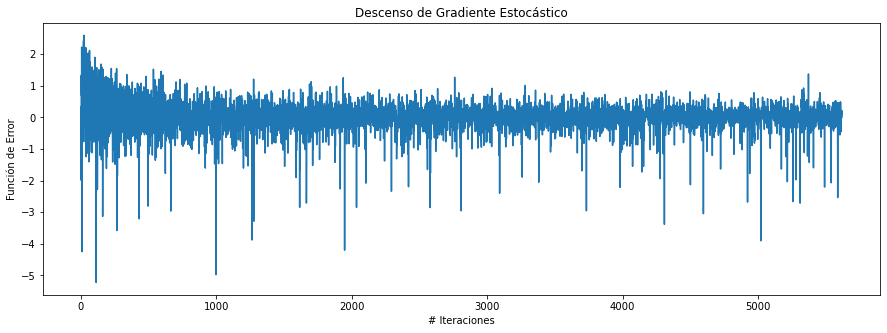

In [32]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

## Selección de Hiperparámetros
Un método adicional para mejorar nuestros resultados es diseñar una metodología para escoger los hiperparámetros adecuados para el modelo. Esta sección se encargara de mostrar dicha metodología. Decidimos realizar una malla de 4 tasas de entrenamiento por 4 tolerancias. Se escogerán los hiperparámetros que tengan mejor desempeño en el **$R^2$** de prueba. 

In [33]:
#Usamos 2/lambda_max una realización del valor propio máximo de la matriz de varianza como parámetro central.
#Incrementamos y disminuimos en ordenes logaritmicos de base 10 este valor.
tasas = np.array([2/431.02649*10,2/431.02649*1,2/431.02649*0.1,2/431.02649*0.01]) 
tolerancias = np.array([1e-4,1e-5,1e-6,1e-7]) # Las tolerancias también se distribuyen en ordenes de magnitud similares.
r2_test_grid = np.zeros((4,4))
t_i = 0
eps_i = 0
for t_i, tasa in enumerate(tasas):
    for eps_i, eps in enumerate(tolerancias):
        #Inicialización de w
        w0 = np.random.random(size=p)# Inicializar aleatoriamente #
        w = w0.copy()
        #Selección de par aleatorio
        i = np.random.randint(low=0, high=n_train-1)# Posición aleatoria #
        xActual = X_train_array[i]
        yActual = y_train_array[i]
        #Inicialización de criterio de parada
        # Encontramos que para 1e-8 empiezan a haber rendimientos decrecientes en el número de iteraciones.
        # Más iteraciones (menos eps) no implica un aumento considerable en el R2 de prueba. 
        error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
        dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
        #Lista para monitorear aprendizaje
        errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
        #Ciclo iterativo según algoritmo de descenso de gradiente
        k = 0 # Número de iteraciones
        while dif>eps:
            # Desarrollo de algoritmo #
            gActual = np.dot(w,xActual) # Valor de g(wx)
            error = gActual-yActual # Error de la iteración
            errores.append(error) # Inserta el error
            w_new = w - tasa*error*xActual # Calcula el nuevo valor de w
            dif = np.linalg.norm(w_new-w) # Calcula la norma para el criterio de parada
            w = w_new # Asigna w para la siguiente iteración
            i = np.random.randint(low=0, high=n_train-1)# Posición aleatoria #
            xActual = X_train_array[i] # Escoge xActual y yActual para la siguiente iteración
            yActual = y_train_array[i]
            k += 1 # Actualiza el contador
            
        # EVALUACIÓN DE MODELO
        # Calcula los valores predichos para el set de entrenamiento
        y_train_preds = np.zeros(y_train_array.shape)
        for i in range(X_train_array.shape[0]):
            y_train_preds[i] = np.dot(w,X_train_array[i])
        # Calcula los valores predichos para el set de prueba
        y_test_preds = np.zeros(y_test_array.shape)
        for i in range(X_test_array.shape[0]):
            y_test_preds[i] = np.dot(w,X_test_array[i])

        r2_train = r2_score(y_train_array, y_train_preds)
        r2_test = r2_score(y_test_array, y_test_preds)
        r2_test_grid[t_i,eps_i] = r2_test
        print(f'tasa: {np.format_float_scientific(tasa,4)} tolerancia: {np.format_float_scientific(eps,4)} R2 entrenamiento: {round(r2_train,4)} \033[1mR2 prueba: {round(r2_test,4)}\033[0m Iteraciones: {k}')

tasa: 4.6401e-02 tolerancia: 1.e-04 R2 entrenamiento: 0.8539 R2 prueba: 0.8497 Iteraciones: 721
tasa: 4.6401e-02 tolerancia: 1.e-05 R2 entrenamiento: 0.7758 R2 prueba: 0.7319 Iteraciones: 1520
tasa: 4.6401e-02 tolerancia: 1.e-06 R2 entrenamiento: 0.8827 R2 prueba: 0.871 Iteraciones: 7938
tasa: 4.6401e-02 tolerancia: 1.e-07 R2 entrenamiento: 0.8951 R2 prueba: 0.8693 Iteraciones: 122588
tasa: 4.6401e-03 tolerancia: 1.e-04 R2 entrenamiento: 0.4787 R2 prueba: 0.4461 Iteraciones: 174
tasa: 4.6401e-03 tolerancia: 1.e-05 R2 entrenamiento: -0.1537 R2 prueba: -0.1366 Iteraciones: 6
tasa: 4.6401e-03 tolerancia: 1.e-06 R2 entrenamiento: 0.7179 R2 prueba: 0.7214 Iteraciones: 1022
tasa: 4.6401e-03 tolerancia: 1.e-07 R2 entrenamiento: 0.8997 R2 prueba: 0.8956 Iteraciones: 27419
tasa: 4.6401e-04 tolerancia: 1.e-04 R2 entrenamiento: -1.0195 R2 prueba: -1.0156 Iteraciones: 166
tasa: 4.6401e-04 tolerancia: 1.e-05 R2 entrenamiento: -0.4439 R2 prueba: -0.4366 Iteraciones: 470
tasa: 4.6401e-04 tolerancia: 

## Mejor Modelo
En la siguiente celda se corre el mejor modelo encontrado:

tasa: 4.6401e-03 tolerancia: 1.e-07 R2 entrenamiento: 0.899 R2 prueba: 0.8935 Iteraciones: 31310


Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

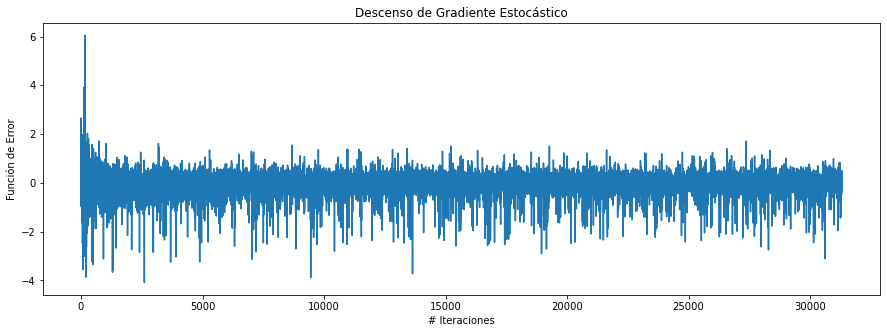

In [34]:
# Se obtiene la tasa y epsilon que mejor se desempeñaron en la malla:
ind_max = np.unravel_index(np.argmax(r2_test_grid), r2_test_grid.shape)
tasa_max = tasas[ind_max[0]]
eps_max = tolerancias[ind_max[1]]
#Inicialización de w
w0 = np.random.random(size=p)# Inicializar aleatoriamente #
w = w0.copy()
#Selección de par aleatorio
i = np.random.randint(low=0, high=n_train-1)# Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]
#Inicialización de criterio de parada
# Encontramos que para 1e-8 empiezan a haber rendimientos decrecientes en el número de iteraciones.
# Más iteraciones (menos eps) no implica un aumento considerable en el R2 de prueba. 
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
#Ciclo iterativo según algoritmo de descenso de gradiente
k = 0 # Número de iteraciones
tasa = tasa_max
eps = eps_max
while dif>eps:
    # Desarrollo de algoritmo #
    gActual = np.dot(w,xActual) # Valor de g(wx)
    error = gActual-yActual # Error de la iteración
    errores.append(error) # Inserta el error
    w_new = w - tasa*error*xActual # Calcula el nuevo valor de w
    dif = np.linalg.norm(w_new-w) # Calcula la norma para el criterio de parada
    w = w_new # Asigna w para la siguiente iteración
    i = np.random.randint(low=0, high=n_train-1)# Posición aleatoria #
    xActual = X_train_array[i] # Escoge xActual y yActual para la siguiente iteración
    yActual = y_train_array[i]
    k += 1 # Actualiza el contador

# EVALUACIÓN DE MODELO
# Calcula los valores predichos para el set de entrenamiento
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])
# Calcula los valores predichos para el set de prueba
y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])

r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'tasa: {np.format_float_scientific(tasa,4)} tolerancia: {np.format_float_scientific(eps,4)} R2 entrenamiento: {round(r2_train,4)} \033[1mR2 prueba: {round(r2_test,4)}\033[0m Iteraciones: {k}')

plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

## Visualización de Hiperparámetros:

Text(0.5, 1.0, 'Oscuro es mejor R2!')

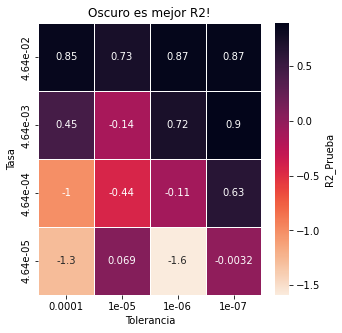

In [37]:
import seaborn as sns
tasas_nice = map(lambda x: np.format_float_scientific(x,2), tasas)
plt.figure(figsize=(5,5))
ax = sns.heatmap(r2_test_grid, annot=True, linewidth=0.5, cmap = sns.cm.rocket_r, cbar_kws={'label': 'R2_Prueba'})
plt.xlabel('Tolerancia')
plt.ylabel('Tasa')
ax.set_xticklabels(tolerancias)
ax.set_yticklabels(tasas_nice)
plt.title('Oscuro es mejor R2!')

La figura permite observar la región en la que los hiperparámetros alcanzan un buen R2 en prueba. Para este caso en específico la malla podría utilizar tasas de entrenamiento más grandes para explorar mejor la región cerca al óptimo global. Como era de esperarse generalmente mayor tolerancia implica peor desempeño.